In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

> ## Load Modules

In [2]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings 
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load the Datasets

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print("DataSet is loaded...")

DataSet is loaded...


In [4]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [5]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

## Creat a dataframe

In [6]:
df = pd.DataFrame()
df["speech"] = paths
df["label"] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [7]:
df["label"].value_counts()

fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: label, dtype: int64

## Exploratity of Data

<Axes: xlabel='label', ylabel='count'>

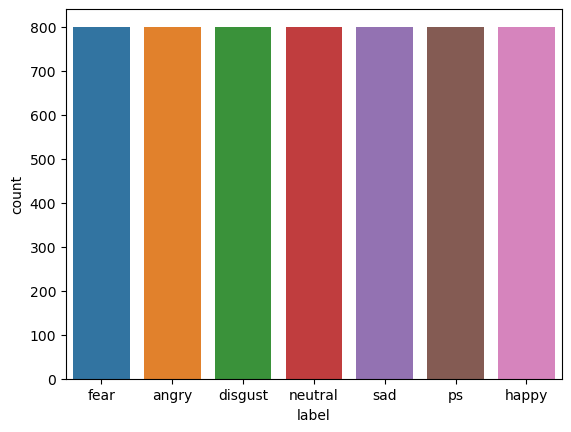

In [8]:
sns.countplot(x=df["label"])

In [9]:
def wavplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data)
    

    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    

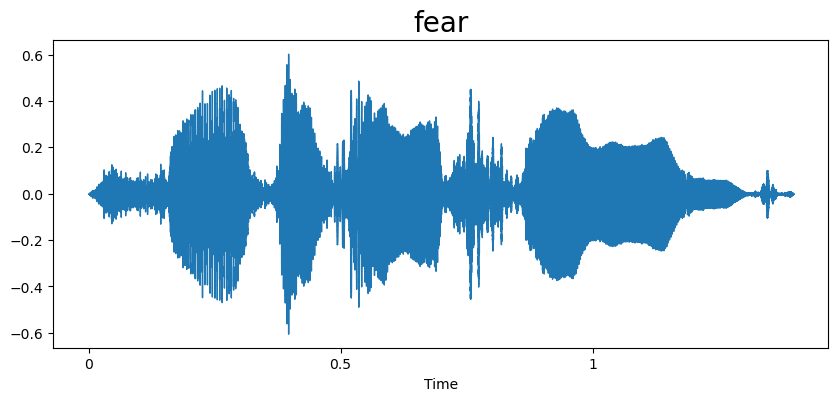

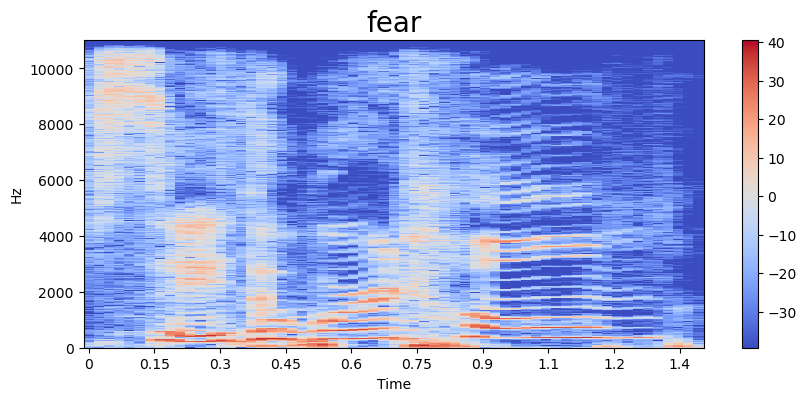

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path) 


wavplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

In [11]:
Audio(path)


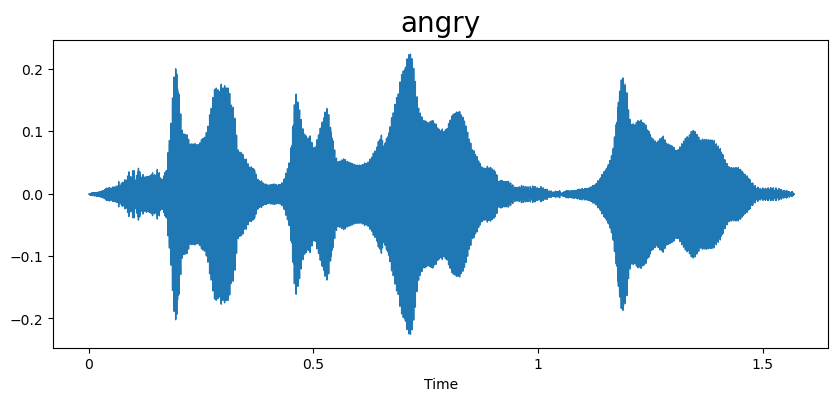

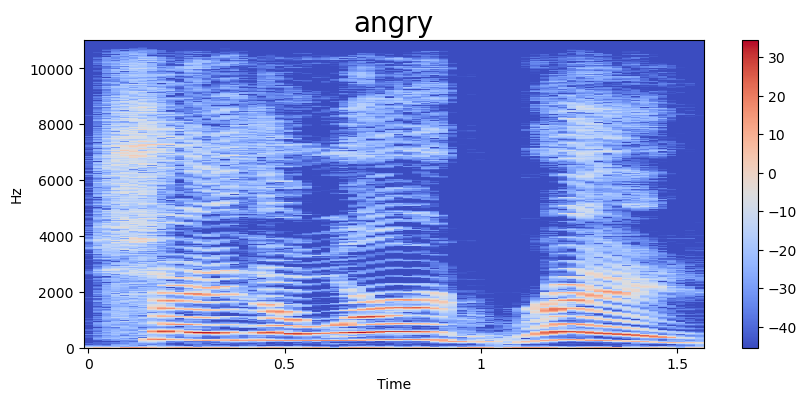

In [12]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path) 


wavplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

In [13]:
path

'/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_raid_angry.wav'

In [14]:
Audio(path)


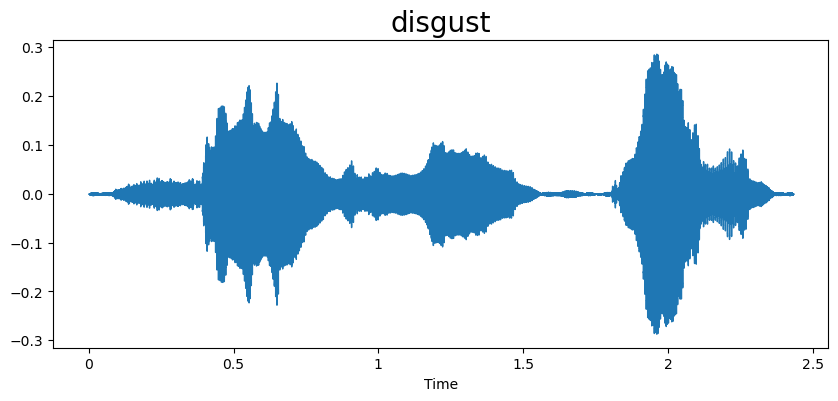

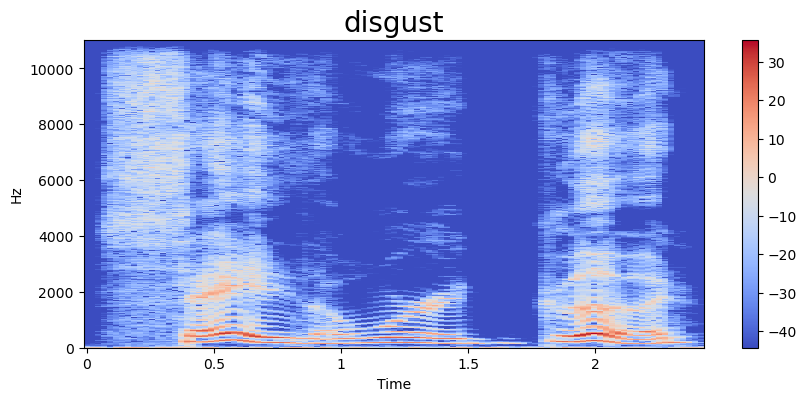

In [15]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path) 


wavplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

In [16]:
Audio(path)

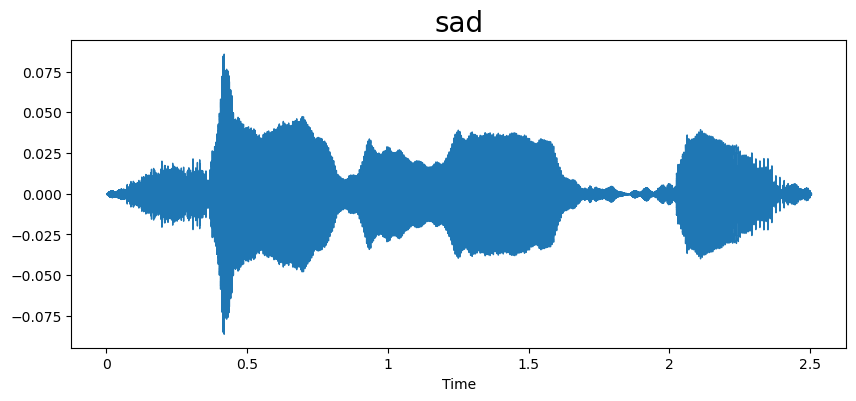

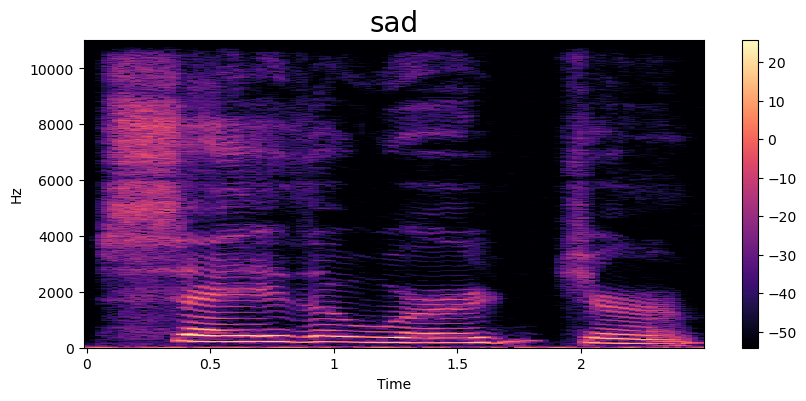

In [17]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path) 


wavplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

In [18]:
Audio(path)

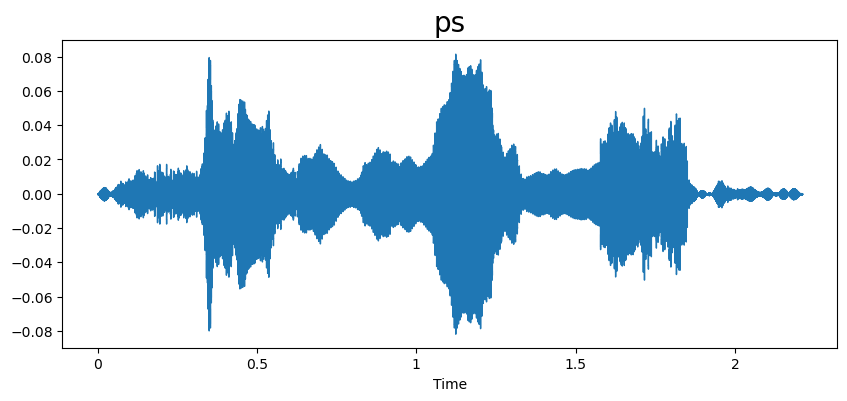

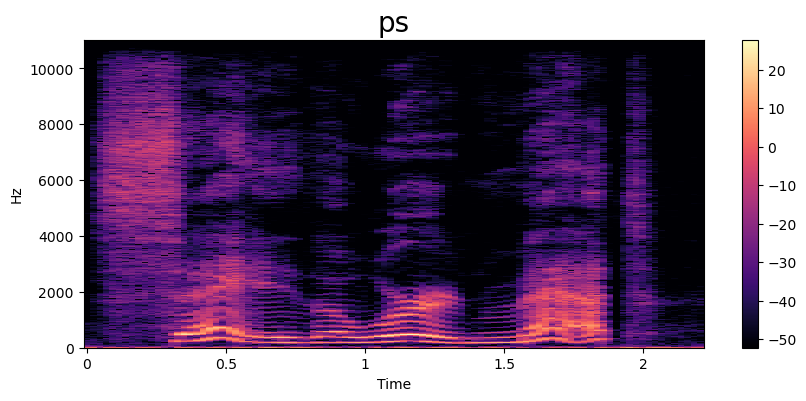

In [19]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path) 


wavplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

In [20]:
Audio(path)

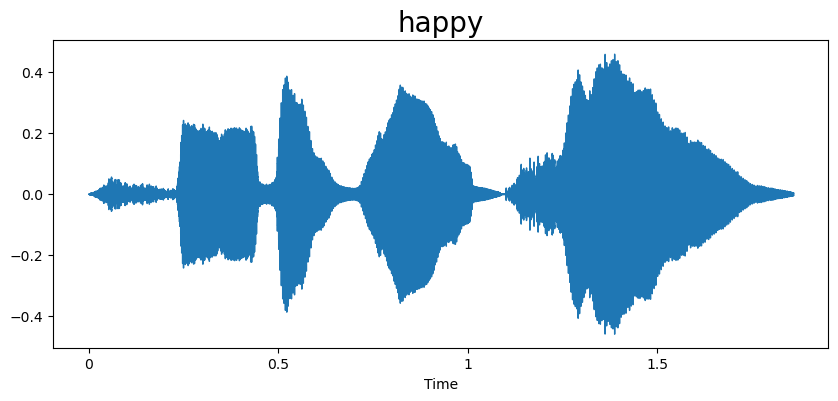

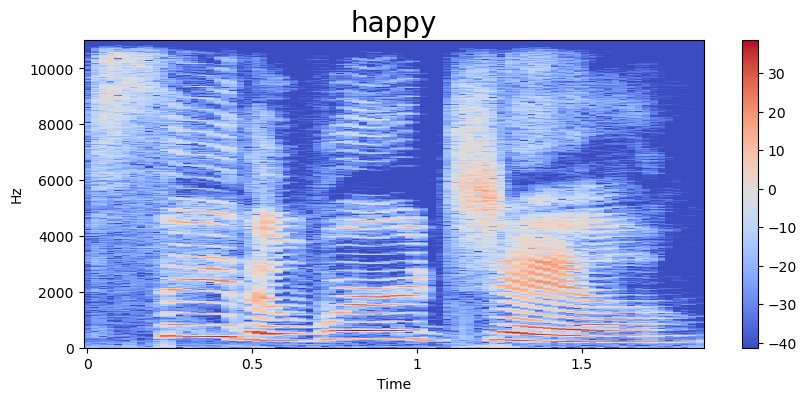

In [21]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path) 


wavplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

In [22]:
Audio(path)

In [23]:
librosa.load(path, duration=3, offset=0.5)

(array([-0.05997025, -0.06198414, -0.06068564, ...,  0.00062123,
         0.00037317,  0.        ], dtype=float32),
 22050)

In [24]:
y, sr = librosa.load(path, duration=3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mfcc.shape

(40,)

## Feature Extraction

In [25]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [26]:
extract_mfcc(df['speech'][0])

array([-285.7373    ,   85.78295   ,   -2.1689105 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.412452  ,   -3.0002632 ,
          1.0844971 ,   11.078272  ,  -17.419662  ,   -8.093215  ,
          6.5879736 ,   -4.220953  ,   -9.15508   ,    3.521479  ,
        -13.186381  ,   14.078853  ,   19.669733  ,   22.725618  ,
         32.574642  ,   16.325031  ,   -3.8427277 ,    0.89629626,
        -11.239262  ,    6.653462  ,   -2.5883691 ,   -7.7140174 ,
        -10.941658  ,   -2.4007556 ,   -5.2812862 ,    4.2711563 ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.8697433 ,
         -1.6027985 ,    2.5600505 ,   11.454375  ,   11.23345   ],
      dtype=float32)

In [27]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [28]:
X_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
5595    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
5596    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
5597    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.14743, 101.68391, -14.175895, -12.037377...
5599    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: speech, Length: 5600, dtype: object

In [29]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [30]:
# split input
X = np.expand_dims(X, -1)
X.shape, X_mfcc.shape

((5600, 40, 1), (5600,))

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()
y, y.shape

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 (5600, 7))

## Create The LSTM Model

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [33]:
model = Sequential(
[
    LSTM(123,     return_sequences=False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax'),
    

]
)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [34]:
# Train the model
history = model.fit(X,y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
9/9 [==============================] - 9s 85ms/step - loss: 1.8465 - accuracy: 0.2801 - val_loss: 1.9740 - val_accuracy: 0.1286
Epoch 2/100
9/9 [==============================] - 0s 18ms/step - loss: 1.5282 - accuracy: 0.5158 - val_loss: 1.8077 - val_accuracy: 0.1580
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 1.1336 - accuracy: 0.6621 - val_loss: 1.6443 - val_accuracy: 0.1554
Epoch 4/100
9/9 [==============================] - 0s 16ms/step - loss: 0.7799 - accuracy: 0.7290 - val_loss: 1.3271 - val_accuracy: 0.3295
Epoch 5/100
9/9 [==============================] - 0s 15ms/step - loss: 0.5951 - accuracy: 0.7797 - val_loss: 0.8743 - val_accuracy: 0.6277
Epoch 6/100
9/9 [==============================] - 0s 14ms/step - loss: 0.4338 - accuracy: 0.8504 - val_loss: 0.6154 - val_accuracy: 0.7741
Epoch 7/100
9/9 [==============================] - 0s 15ms/step - loss: 0.3529 - accuracy: 0.8772 - val_loss: 0.5399 - val_accuracy: 0.7652
Epoch 8/100
9/9 [===

## Plot the results

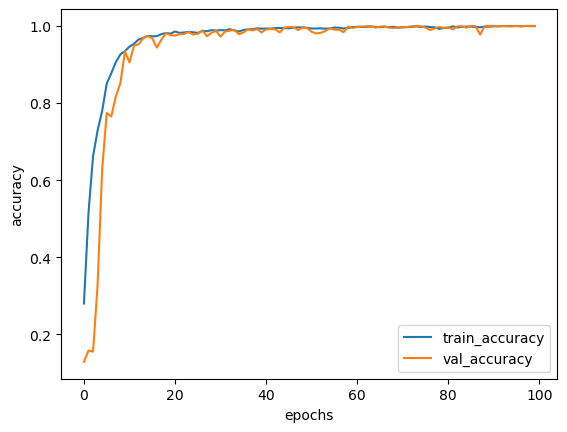

In [35]:
epochs = 100
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(range(epochs), acc, label="train_accuracy")
plt.plot(range(epochs), val_acc, label="val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.legend()

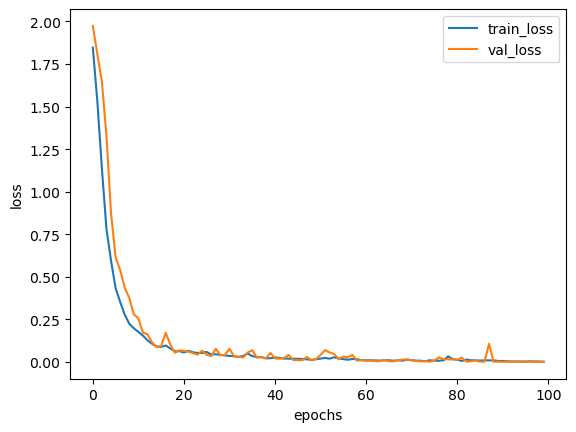

In [36]:
epochs = 100
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(epochs), loss, label="train_loss")
plt.plot(range(epochs), val_loss, label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.legend()